In [86]:
import numpy as np
import  pandas as pd
import seaborn as sns

In [87]:
df = sns.load_dataset('iris')

In [88]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
encoder = LabelEncoder()

In [91]:
df['species'] = encoder.fit_transform(df['species'])

In [92]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


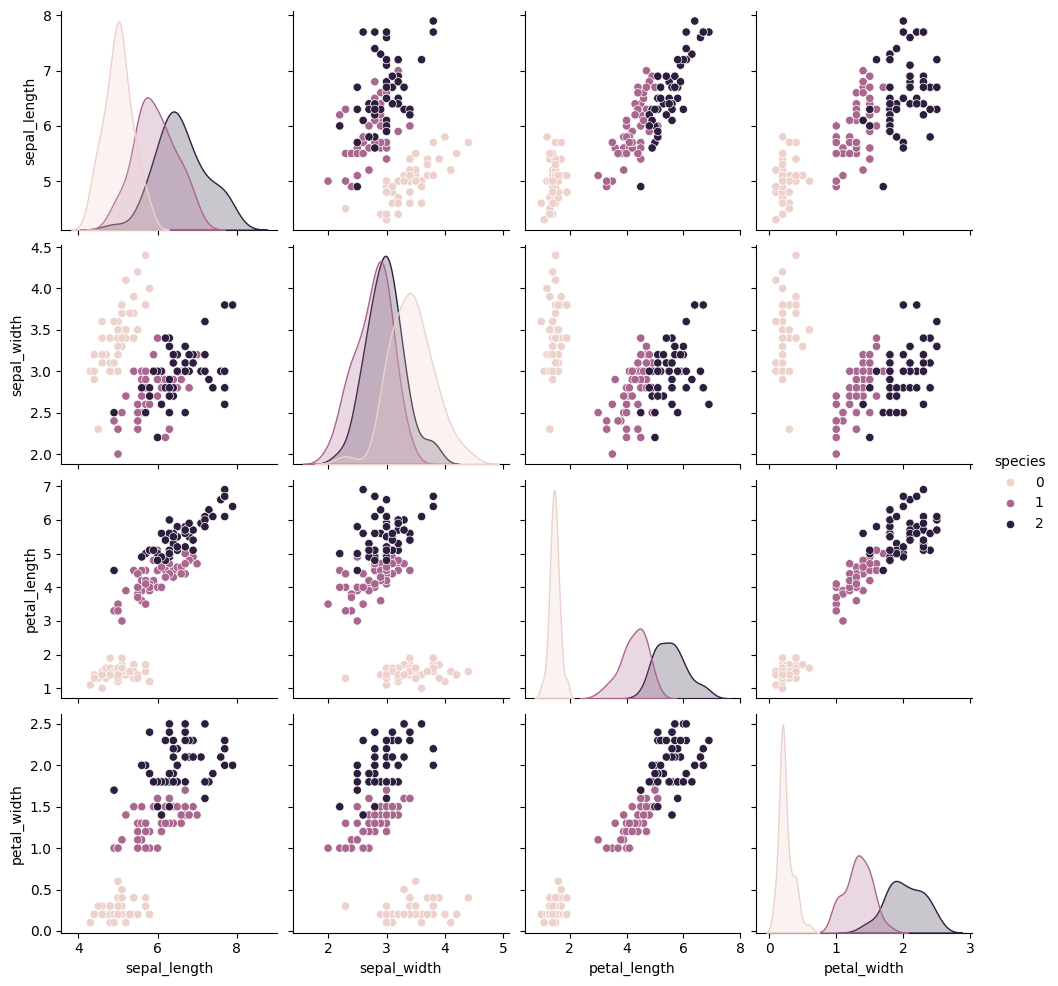

In [93]:
sns.pairplot(df, hue='species')

In [94]:
new_df = df[df['species'] != 0][['sepal_length', 'sepal_width', 'species']]

In [95]:
new_df.head()

,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [96]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [98]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier()

In [99]:
estimators = [('lr', clf1), ('rf', clf2), ('knn', clf3)]

In [100]:
for estimator in estimators:
    x = cross_val_score(estimator[1], X, y, cv=10, scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.81
rf 0.76
knn 0.71


In [101]:
from sklearn.ensemble import VotingClassifier

HARD VOTING

In [102]:
vc = VotingClassifier(estimators=estimators)
x = cross_val_score(vc, X, y, cv=10, scoring='accuracy')
print(np.round(np.mean(x), 2))

0.77


SOFT VOTING


In [103]:
vc1 = VotingClassifier(estimators=estimators, voting='soft')
x = cross_val_score(vc1, X, y, cv=10, scoring='accuracy')
print(np.round(np.mean(x), 2))

0.76
